# Exploratory data analysis of Auckland rainfall data


In this notebook, I am applying EDA methods to analyse rainfall data in Auckland between 1872 and 1997 and summarise the main characteristics. 

A set of tables was taken from the Auckland Council website: 
<a href="https://environmentauckland.org.nz/Data/DataSet/Summary/Location/A64871M/DataSet/Rainfall/Continuous/Interval/Latest">Link to Website</a> Five tables contain the daily amount of rainfall  in millimetres, measured at two different locations: Mt Albert and City centre. The tables cover various time intervals starting from 6 years to 140 years, and they include both measured values and synthesized data. 

We will explore here one of the data files, A64871M, covering a period between 1872 and 1997. The table is named AucklandRainfall1872-1997.csv, and it contains five columns and 31652 rows, but only two columns are needed for our analysis:  dates and the amount of rain in millimeters. The dates are given for NZST (UTC +12h) time zone. The frequency of the measurements is between 1 and 10 days. 

### 1. Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import seaborn as sns
#setting default seaborn settings
sns.set()

### 2. Reading input file

To read the rain data, we will use the Panda's function pd.read_csv(). 

In [2]:
#setting the file path and the file name
file = 'Data/AucklandRainfall1872-1997.csv'

#reading file into dataframe: rain, and setting date column  as an index column of Datetime type 
rain=pd.read_csv(file, skiprows=3, header=None,
                  names=['Date','rain_value', 'grade', 'interpol_type', 'event_timestamp'],
                  parse_dates=['Date'],
                  index_col='Date')

#printing the first lines of the dataframe
rain.head(5)

,rain_value,grade,interpol_type,event_timestamp
Date,,,,
1872-01-03,0.00,200,5,NaN
1872-01-04,3.81,200,5,NaN
1872-01-05,2.03,200,5,NaN
1872-01-09,0.00,200,5,NaN
1872-01-10,0.51,200,5,NaN


### 3. Removing unnecessary columns

Three columns: grade, interpol_type, and event_timestamp have the same values throughout the table. At this stage of the analysis, we can remove them from the table. 

In [3]:
#counting unique values for three columns
display(rain['grade'].value_counts(sort=True, normalize=True))
display(rain['interpol_type'].value_counts(sort=True, normalize=True))
display(rain['event_timestamp'].value_counts(sort=True, normalize=True))

#dropping columns     
rain=rain.drop(columns=['event_timestamp', 'grade', 'interpol_type'])

200    1.0
Name: grade, dtype: float64

5    1.0
Name: interpol_type, dtype: float64

Series([], Name: event_timestamp, dtype: float64)

### 4. Displaying remaining columns

In [4]:
rain.info()
rain.tail(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31652 entries, 1872-01-03 00:00:00 to 1997-09-30 08:30:00
Data columns (total 1 columns):
rain_value    31652 non-null float64
dtypes: float64(1)
memory usage: 494.6 KB


,rain_value
Date,
1997-09-24 08:30:00,63.4
1997-09-25 08:30:00,15.0
1997-09-26 08:30:00,0.4
1997-09-29 08:30:00,80.2
1997-09-30 08:30:00,19.3


### 5. Exploring the Date column

By exploring the Date column, we can find that only one measurement was recorded per day and that on about 30% of days, the amount of rain was not documented. 

In [5]:
#another way of finding the start and end date for the measurements 
print('Start date: ', min(rain.index), 'End date: ', max(rain.index))

#unique dates .vs. total number of dates:
print('Unique dates:', len(rain.index.unique()), '.v.s. Total number of dates:', rain.shape[0])

#number of days without measurements .vs. total number of days
delta=max(rain.index)-min(rain.index)
no_measurements=delta.days-rain.shape[0]
print('Total number of days:', delta.days, '.vs. Number of days without measurements:',no_measurements)

Start date:  1872-01-03 00:00:00 End date:  1997-09-30 08:30:00
Unique dates: 31652 .v.s. Total number of dates: 31652
Total number of days: 45926 .vs. Number of days without measurements: 14274


### 6. Exploring the rain_value column

By exploring the rain_value column we can find number of days with the zerro amount of rain and also the dates with the maximum rainfall. 

In [6]:
#counting the frequency of rain values
rain_days= rain['rain_value'].value_counts(dropna=True, sort=True)

#number of days with 0 records .vs. total number of days
print('Number of days without rain:', rain_days[0], '---', round(rain_days[0]/rain.shape[0] *100, 0),'%')

#dates with the maximum rainfalls:
rain_sorted=rain.sort_values(by='rain_value', ascending=False)
display(rain_sorted.head(5))

Number of days without rain: 8473 --- 27.0 %


,rain_value
Date,
1936-02-02,162.05
1985-05-23,156.60
1979-02-18,142.20
1917-02-04,140.72
1989-08-26,133.30


### 7. Finding number of days with little rain

After excluding dates recorded as days with zero rain, we can find out how many days have rainfall less than 20 mm per day. 

In [7]:
#setting a constant for amount of rain per day in mm
rain_c=20

#sorting rain frequency dataframe (rain_days)
rain_sorted=rain_days.sort_index()

#selecting only values of rain between 0.1 and rain_c & summing number of days
days_no=rain_sorted[rain_sorted.index[1]:rain_c].values.sum()

#finding percentage of days with rain_c amount of rain
rain_perc=round(days_no/rain.shape[0]*100, 0)

print('Number of days with rain less than', rain_c, ' mm/day:', days_no, '---', rain_perc, '%', '\n')

Number of days with rain less than 20  mm/day: 21512 --- 68.0 % 



### 8. Plotting all data

Python has several different libraries for plotting data. We will use the Matplotlib library and Pandas built-in function .plot() for plotting rain DataFrame. 

Text(0.5, 1.0, 'Rainfall in Auckland between 1872 and 1997')

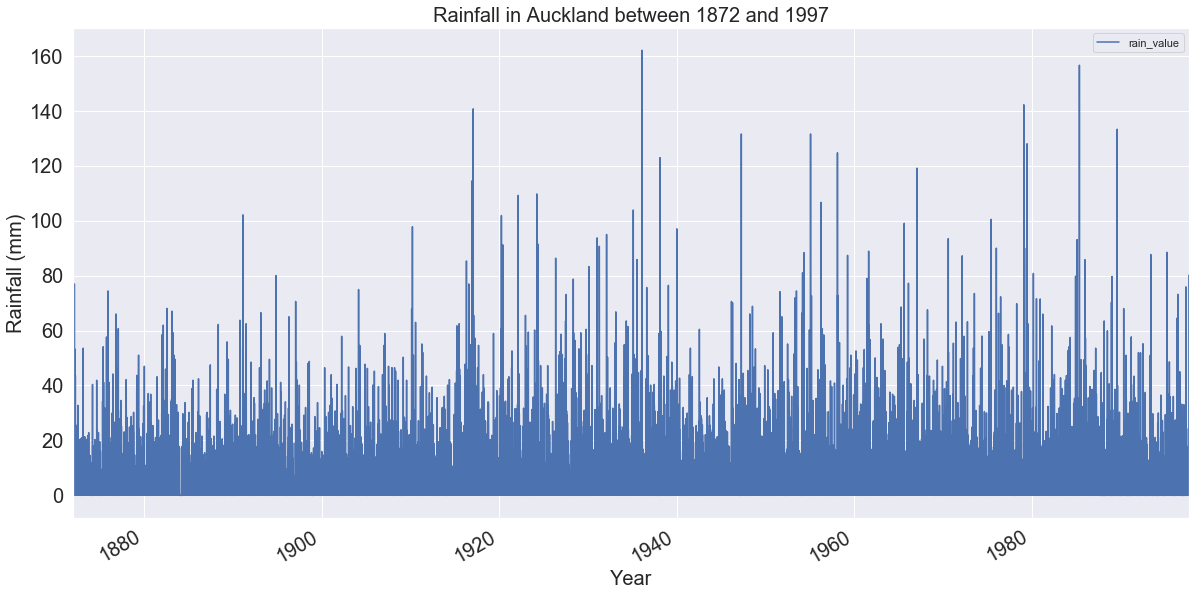

In [8]:
rain.plot(figsize=(20,10), fontsize=20)
#setting xlabel, ylabel and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (mm)', fontsize=20)
plt.title('Rainfall in Auckland between 1872 and 1997', fontsize=20)

### 9. Plotting three different periods

We will plot three selected intervals, each two years long, from the start of the data set, middle, and the end of the file. If we assume that all rain values were collected in the same way and that all zero points represent days without rain, then we can expect to see seasonal changes across a year plus variations from year to year. 

Text(0.5, 1.0, 'Auckland rainfall')

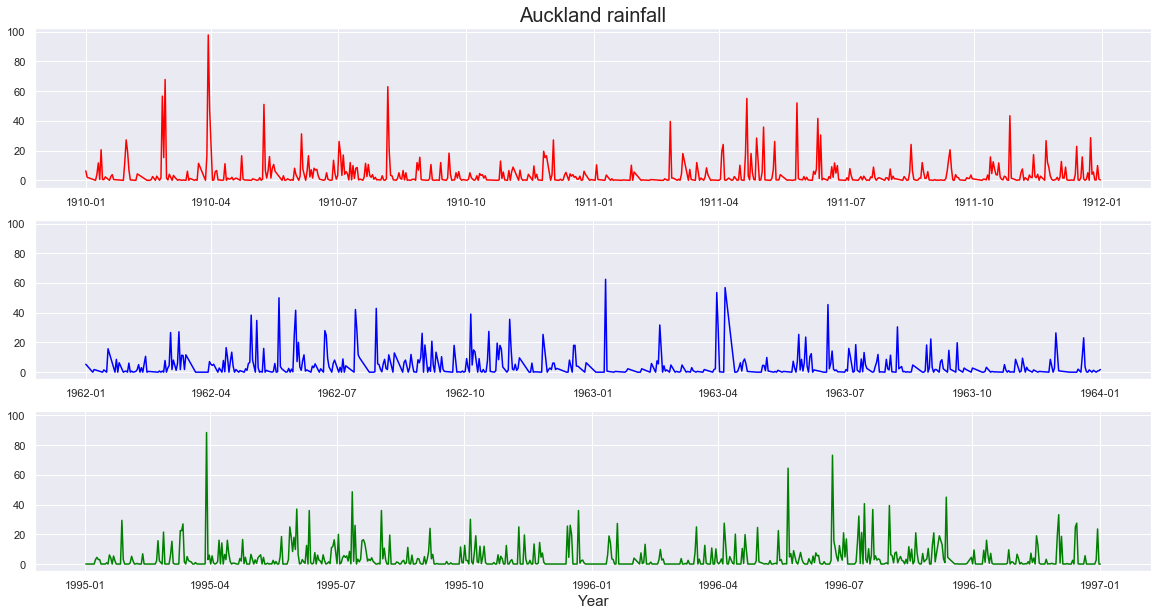

In [9]:
#selecting various time intervals from the rain dataframe
rain_1012=rain['1910-01-01': '1912-01-01']
rain_6264=rain['1962-01-01': '1964-01-01']
rain_2022=rain['1995-01-01': '1997-01-01']

#plotting rain values for three intervals using plt.subplots()
fig,ax=plt.subplots(3,1, figsize=(20,10), sharey=True)
ax[0].plot(rain_1012.index, rain_1012['rain_value'], color='red')
ax[1].plot(rain_6264.index, rain_6264['rain_value'], color='blue')
ax[2].plot(rain_2022.index, rain_2022['rain_value'], color='green')

ax[2].set_xlabel('Year', fontsize=15)
ax[0].set_title('Auckland rainfall', fontsize=20)

### 10. Finding seasonal changes

The best way to examine seasonal changes is to use Pandas methods df.rolling() or df.resample().
By applying a rolling window of one year, two years, and five years we can notice variations in the amount of rain from year to year. From the plot, we can observe an unexpected change in the amount of rain between 1910 and 1920. The reason for this might be because of errors in records or because of the real change in Auckland weather during that period. 

Text(0.5, 1.0, 'Mean rainfall variations per one year, two and five years')

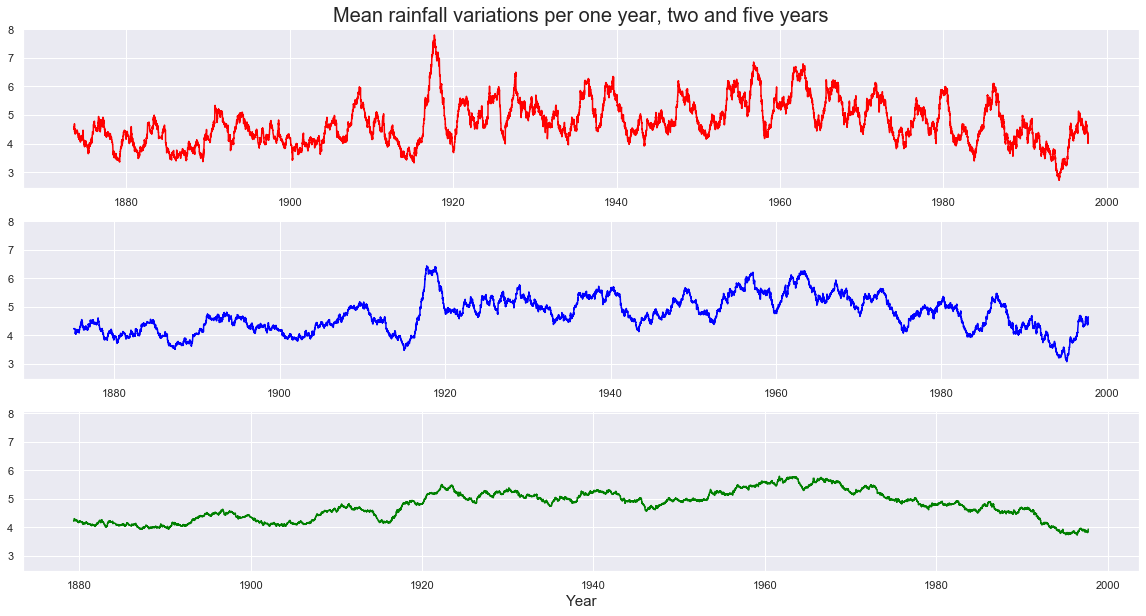

In [10]:
#defining various rolling windows 
rain_rw1=rain.rolling(window=365).mean()
rain_rw2=rain.rolling(window=730).mean()
rain_rw3=rain.rolling(window=1825).mean()

#plotting dataframes
fig,ax=plt.subplots(3,1, figsize=(20,10), sharey=True)
ax[0].plot(rain_rw1.index, rain_rw1['rain_value'], color='red')
ax[1].plot(rain_rw2.index, rain_rw2['rain_value'], color='blue')
ax[2].plot(rain_rw3.index, rain_rw3['rain_value'], color='green')
ax[2].set_xlabel('Year', fontsize=15)
ax[0].set_title('Mean rainfall variations per one year, two and five years', fontsize=20)

### 11. Exploring extreme changes in rainfall over the period 1910 to 1920


Text(0, 0.5, 'Mean rainfall (mm)')

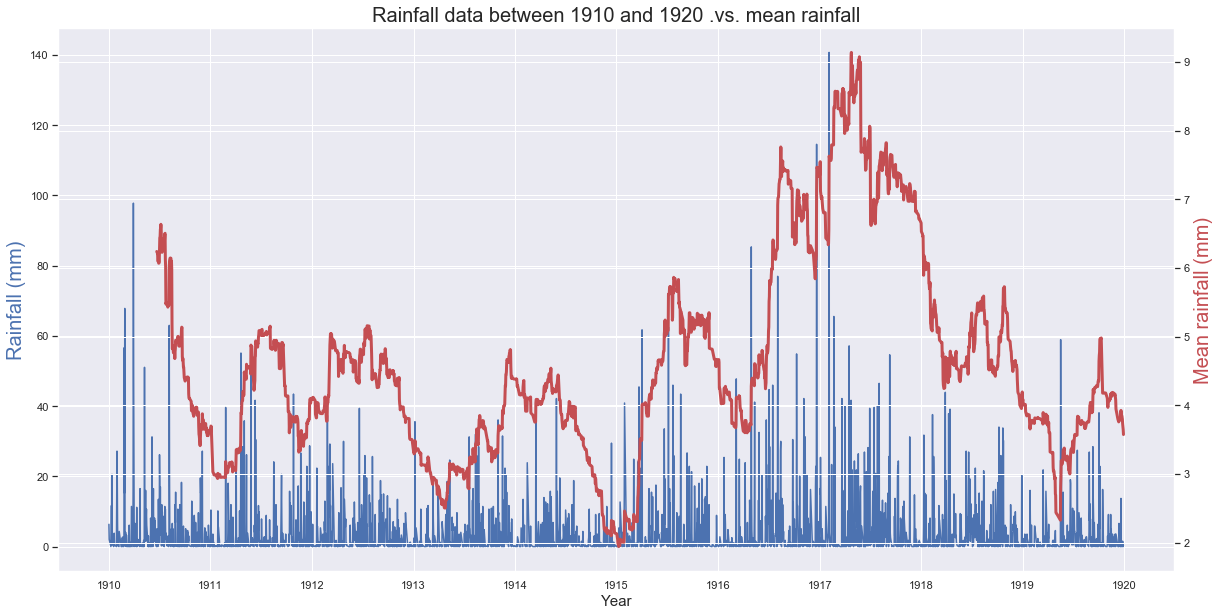

In [11]:
#selecting data between 1910 and 1920
rain_1020=rain['1910-01-01': '1920-01-01']

#calculating mean rainfall per year with a rolling window of 120 days
rain_rw1020=rain_1020.rolling(window=120).mean()

#overplotting two curves with two different scales
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(rain_1020.index, rain_1020['rain_value'], color='b')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Rainfall (mm)', color='b', fontsize=20)
ax.set_title('Rainfall data between 1910 and 1920 .vs. mean rainfall', fontsize=20)

ax2=ax.twinx()
ax2.plot(rain_rw1020.index, rain_rw1020['rain_value'], color='r', linewidth=3)
ax2.set_ylabel('Mean rainfall (mm)', fontsize=20, color='r')

### 12. Plotting monthly rainfall

Text(0.5, 1.0, 'Median monthly rainfall')

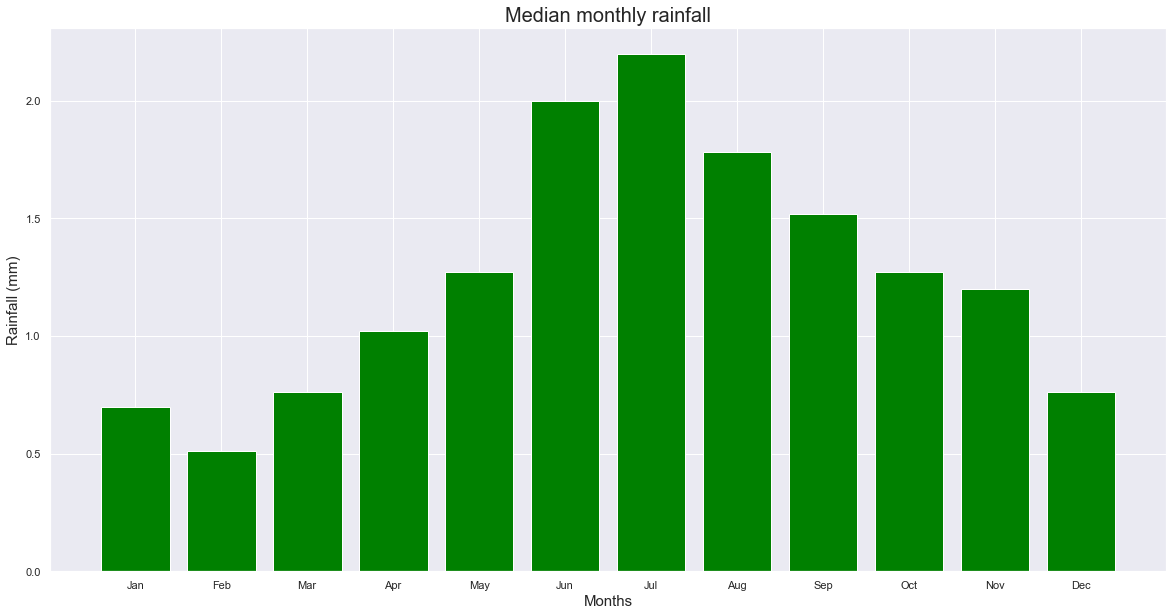

In [12]:
#grouping data per month
rain_new=rain.groupby(rain.index.month).median()

#creating a new column with months names
rain_new['Month']=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plotting a barplot 
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(rain_new['Month'], rain_new['rain_value'], color='green')

ax.set_xlabel('Months', fontsize=15)
ax.set_ylabel('Rainfall (mm)',fontsize=15)
ax.set_title('Median monthly rainfall', fontsize=20)